In [1]:
#Preamble
import tensorflow as tf
#enable Eager execution
tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt
import TaylorFlow_190717 as tlf

def ComplexInnerProduct(a,b,delta_f,weights='none'):
    "computes complex inner product in the fourier domain IP = 4RE deltaf sum((a * conguagte(b))/PSD Weights)"
    if weights =='none':
        weights = np.ones(len(a))
        
    return 4*df*(np.vdot((a/weights),(b/weights)))

def InnerProduct(a,b,delta_f,weights='none'):
    "returns real component of Inner Product"
    return ComplexInnerProduct(a,b,delta_f,weights).real

def sigsq(a,weight,delta_f):
    "returns the normal of a waveform (root of inner product with itself)"
    return 4*df*np.real((np.vdot((a/weights),(a/weights))))

def sig(a,weight,delta_f):
    
    return np.sqrt(sigsq(a,weight,delta_f))

def overlap(h1,h2,psd,delta_f):
    "returns the normalised overlap of the signals "
    overlap = (1/sig(h1,psd,delta_f)/sig(h2,psd,delta_f))*InnerProduct(h1,h2,df,weights)
    return overlap

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(self.numpy(), dtype=dtype)


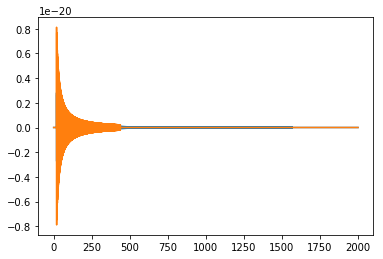

In [2]:
s1_m1 = 1.4
s1_m2 = 1.4
s2_m1 = 5
s2_m2 = 5
df = 1./512
tc_ = 1.
f_low = 20
f_high = 2000.

freq1, wvf1 = tlf.TaylorFlow(s1_m1, s1_m2, f_low=f_low, f_high=f_high, df = df, t_c=tc_, phi_c = 0)
freq2, wvf2 = tlf.TaylorFlow(s2_m1, s2_m2, f_low=f_low, f_high=f_high, df = df, t_c=tc_, phi_c = 0)

plt.plot(freq1.numpy(),wvf1)
plt.plot(freq2.numpy(),wvf2)

In [3]:
weights = np.ones(len(wvf1))
InnerP = ComplexInnerProduct(wvf1,wvf2,df)
RealInnerP= InnerProduct(wvf1,wvf2,df)
sigsqh1 = sigsq(wvf1,weights,df)
sigsqh2 = sigsq(wvf2,weights,df)
sigh1 = sig(wvf1,weights,df)
sigh2 = sig(wvf2,weights,df)
signal_overlap = overlap(wvf1,wvf2,weights,df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


In [4]:
print(InnerP)
print(RealInnerP)
print(sigsqh1) 
print(sigsqh2)
print(sigh1)
print(sigh2)
print(signal_overlap)

(1.3480375619681433e-39-9.425921701434902e-45j)
1.3480375619681433e-39
4.718321693155034e-40
3.89410088270153e-39
2.1721698122280943e-20
6.240273137212448e-20
0.994499618004643
